### **Sobel算子**

* Sobel算子是通过离散微分方法求取边缘的算子，还结合了高斯平滑滤波的思想，将滤波器大小由 ksize × 1 改进为 ksize × ksize，边缘检测效果更明显

* 使用Sobel算子提取图像边缘的过程大致分为以下3个步骤：
1. 提取x方向的边缘，x方向一阶Sobel边缘检测算子如下所示$$\begin{bmatrix} -1 & 0 & 1\\ -2 & 0 & 2\\ -1 & 0 & 1\end{bmatrix}$$
2. 提取y方向的边缘，y方向一阶Sobel边缘检测算子如下所示$$\begin{bmatrix} -1 & -2 & -1\\ 0 & 0 & 0\\ 1 & 2 & 1\end{bmatrix}$$
3. 综合两个方向的边缘信息，一种是求取对应灰度值的绝对值之和，另一种是求取对应灰度值平方和的平方根


* 任意一个方向的差分阶数都需要小于ksize，特殊情况是当ksize=1时，任何一个方向的差分阶数都需要小于3。一般情况下，差分阶数最大值为1时，ksize选3；差分阶数最大值为2时，ksize选5；差分阶数最大值为3时，ksize选7。当ksize选1时，滤波器大小不是1 × 1，而是3 × 1或1 × 3

In [15]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [16]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'equalLena.png', cv.IMREAD_ANYCOLOR)
if img is None:
    print('Failed to read equalLena.png')
    sys.exit

In [17]:
# 为了更好地展现边缘提取，此处定义函数使图像反向
def image_invert(img):
    h, w = img.shape[:2]  # 图片的高度和宽度
    imgInv = np.empty((w, h), np.uint8)  # 创建空白数组
    for i in range(h):
        for j in range(w):
            imgInv[i][j] = 255 - img[i][j]
    return imgInv

In [18]:
# 此处选取差分阶数为1，ksize为3
# x方向的一阶边缘
result_X = cv.Sobel(img, cv.CV_16S, 1, 0, 3)
result_X = cv.convertScaleAbs(result_X)
result_X = image_invert(result_X)
# y方向的一阶边缘
result_Y = cv.Sobel(img, cv.CV_16S, 0, 1, 3)
result_Y = cv.convertScaleAbs(result_Y)
result_Y = image_invert(result_Y)
# 整幅图像的一阶边缘
result_XY = result_X + result_Y

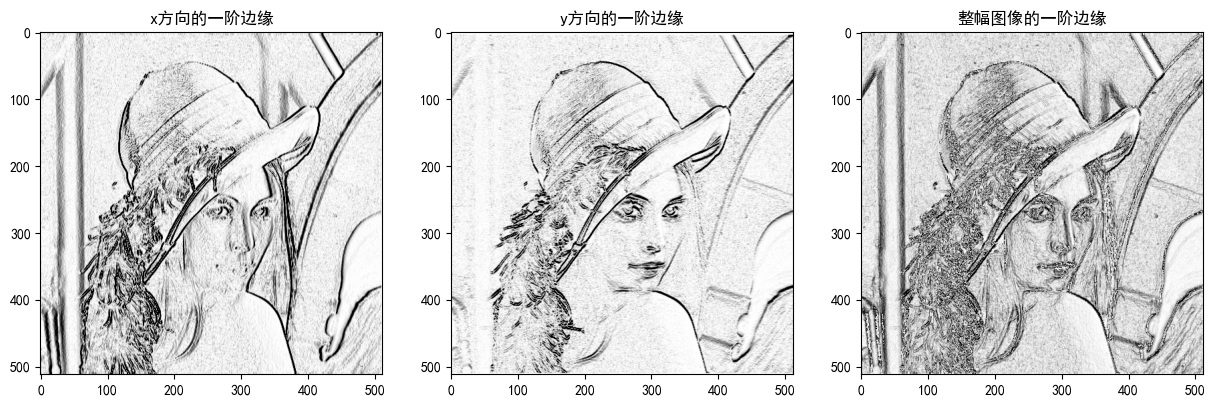

In [19]:
# 展示结果
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('x方向的一阶边缘')
plt.imshow(result_X, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('y方向的一阶边缘')
plt.imshow(result_Y, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('整幅图像的一阶边缘')
plt.imshow(result_XY, cmap='gray')